In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import rcParams

mpl.rcParams['figure.figsize'] = (12,12*0.618)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Computer Modern Roman']
# Times-Roman

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Making Plots

### Keep Tracking of Programs

1. Single frequency neutrino and Rabi: rabi2.nb


Data:

1. Single frequency Rabi formula prediction: `theory10List.csv`
2. Neutrino Oscillations with Matter Perturbation: `sol10PList.csv`

## Plots

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

Defining font size etc

In [4]:
ftsz = 18

In [5]:
theory10List = np.genfromtxt ('theory10List.csv', delimiter=",")
sol10PList = np.genfromtxt ('sol10PList.csv', delimiter=",")

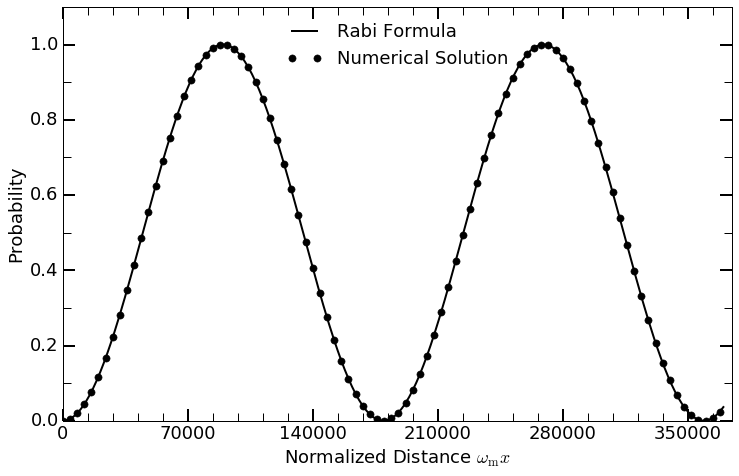

In [98]:
singleFrequencyplt, singleFrequencyax = plt.subplots()

singleFrequencyplt = plt.plot(theory10List[0],theory10List[1],'k-',sol10PList[0][0::4],sol10PList[1][0::4],'ko', markersize=ftsz*0.4, linewidth=2)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}x$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.1])
plt.xlim([0,375000])
plt.legend(['Rabi Formula','Numerical Solution'], fontsize=ftsz,frameon=False,loc=9)

singleFrequencyax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz)
singleFrequencyax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz)

singleFrequencymajorLocator = MultipleLocator(70000)
singleFrequencymajorFormatter = FormatStrFormatter('%d')
singleFrequencyminorLocator = MultipleLocator(14000)

singleFrequencymajorLocatory = MultipleLocator(0.2)
singleFrequencymajorFormattery = FormatStrFormatter('%0.1f')
singleFrequencyminorLocatory = MultipleLocator(0.1)


singleFrequencyax.xaxis.set_major_locator(singleFrequencymajorLocator)
singleFrequencyax.xaxis.set_major_formatter(singleFrequencymajorFormatter)

singleFrequencyax.yaxis.set_major_locator(singleFrequencymajorLocatory)
singleFrequencyax.yaxis.set_major_formatter(singleFrequencymajorFormattery)


# for the minor ticks, use no labels; default NullFormatter
singleFrequencyax.xaxis.set_minor_locator(singleFrequencyminorLocator)
singleFrequencyax.yaxis.set_minor_locator(singleFrequencyminorLocatory)

plt.savefig('rabiOscillationsNeutrinoCoincidence-single-frequency.pdf',bbox_inches='tight')

## Plot 2

In [13]:
%%bash
tree castle-wall

castle-wall
├── probAkhmedovRabiTheoryList-0.0421055.csv
├── probAkhmedovRabiTheoryList-0.0673687.csv
├── probAkhmedovRabiTheoryList-0.0842109.csv
├── probAkhmedovRabiTheoryList-0.168422.csv
├── probAkhmedovRabiTheoryList-0.252633.csv
├── probAkhmedovRabiTheoryList-0.336844.csv
├── probAkhmedovRabiTheoryList-0.421055.csv
├── solAkhList-0.0421055.csv
├── solAkhList-0.0673687.csv
├── solAkhList-0.0842109.csv
├── solAkhList-0.168422.csv
├── solAkhList-0.252633.csv
├── solAkhList-0.336844.csv
└── solAkhList-0.421055.csv

0 directories, 14 files


In [75]:
## Data for $\lambda_2-\lambda_1 = 0.5*\lambda_0$
solAkhList0p5 = np.genfromtxt ('castle-wall/solAkhList-0.421055.csv', delimiter=",")
probAkhmedovRabiTheoryList0p5 = np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.421055.csv', delimiter=",")

## Data for $\lambda_2-\lambda_1 = 0.4*\lambda_0$
solAkhList0p4 = np.genfromtxt ('castle-wall/solAkhList-0.336844.csv', delimiter=",")
probAkhmedovRabiTheoryList0p4 = np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.336844.csv', delimiter=",")

## Data for $\lambda_2-\lambda_1 = 0.3*\lambda_0$
solAkhList0p3 = np.genfromtxt ('castle-wall/solAkhList-0.252633.csv', delimiter=",")
probAkhmedovRabiTheoryList0p3 = np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.252633.csv', delimiter=",")

## Data for $\lambda_2-\lambda_1 = 0.2*\lambda_0$
solAkhList0p2 = np.transpose(np.genfromtxt ('castle-wall/solAkhList-0.168422.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p2 = np.transpose(np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.168422.csv', delimiter=","))

## Data for $\lambda_2-\lambda_1 = 0.1*\lambda_0$
solAkhList0p1 = np.transpose(np.genfromtxt ('castle-wall/solAkhList-0.0842109.csv', delimiter=",") )
probAkhmedovRabiTheoryList0p1 = np.transpose( np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.0842109.csv', delimiter=",") )

## Data for $\lambda_2-\lambda_1 = 0.09*\lambda_0$
solAkhList0p09 = np.transpose(np.genfromtxt ('castle-wall/solAkhList-0.0673687.csv', delimiter=","))
probAkhmedovRabiTheoryList0p09 = np.transpose(np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.0673687.csv', delimiter=","))    

## Data for $\lambda_2-\lambda_1 = 0.05*\lambda_0$
solAkhList0p05 = np.genfromtxt ('castle-wall/solAkhList-0.0421055.csv', delimiter=",")
probAkhmedovRabiTheoryList0p05 = np.genfromtxt ('castle-wall/probAkhmedovRabiTheoryList-0.0421055.csv', delimiter=",")


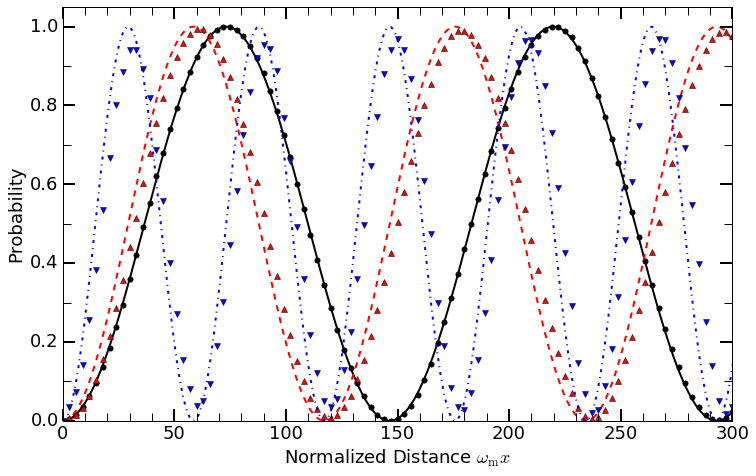

In [97]:
castlewallplt, castlewallax = plt.subplots()

castlewallplt = plt.plot(probAkhmedovRabiTheoryList0p09[0],probAkhmedovRabiTheoryList0p09[1],'k-',\
                         solAkhList0p09[0][0::30],solAkhList0p09[1][0::30],'ko', \
                         probAkhmedovRabiTheoryList0p1[0],probAkhmedovRabiTheoryList0p1[1],'r--',\
                         solAkhList0p1[0][0::30],solAkhList0p1[1][0::30],'r^', \
                         probAkhmedovRabiTheoryList0p2[0],probAkhmedovRabiTheoryList0p2[1],'b-.',\
                         solAkhList0p2[0][0::30], solAkhList0p2[1][0::30],'bv',\
                         markersize=ftsz*0.3, linewidth=2)
plt.xlabel('Normalized Distance $\omega_{\mathrm{m}}x$', fontsize=ftsz)
plt.ylabel('Probability', fontsize=ftsz)
plt.ylim([0,1.05])
plt.xlim([0,300])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)

castlewallax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz)
castlewallax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz)

castlewallmajorLocator = MultipleLocator(50)
castlewallmajorFormatter = FormatStrFormatter('%d')
castlewallminorLocator = MultipleLocator(10)

castlewallmajorLocatory = MultipleLocator(0.2)
castlewallmajorFormattery = FormatStrFormatter('%0.1f')
castlewallminorLocatory = MultipleLocator(0.1)


castlewallax.xaxis.set_major_locator(castlewallmajorLocator)
castlewallax.xaxis.set_major_formatter(castlewallmajorFormatter)

castlewallax.yaxis.set_major_locator(castlewallmajorLocatory)
castlewallax.yaxis.set_major_formatter(castlewallmajorFormattery)


# for the minor ticks, use no labels; default NullFormatter
castlewallax.xaxis.set_minor_locator(castlewallminorLocator)
castlewallax.yaxis.set_minor_locator(castlewallminorLocatory)

plt.savefig('castle-wall.pdf',bbox_inches='tight')